<a href="https://colab.research.google.com/github/FaragoFa/PDI/blob/main/Practica_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Faragó Facundo - 114462

# ACTIVIDAD PRACTICA 5

# Cargar repositorio

In [2]:
! git clone https://github.com/FaragoFa/PDI.git

Cloning into 'PDI'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 37 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), done.


# Importar librerias e Imagenes

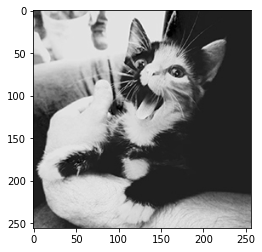

In [3]:
import imageio      #Para leer y guardar imagenes.
import numpy as np  #Operaciones con vectores, matrices, tensores...
import matplotlib.pyplot as plt    #Para realizar graficos.
import matplotlib.image as plti    #Para guardar imagenes.
from matplotlib import cm #Para graficar los kernels
from scipy.signal import convolve2d #Función para hacer la convolución

%matplotlib inline

#Cargo imagen
img = imageio.imread('/content/PDI/Tizona256.jpg')[:,:,0]/255
plt.imshow(img, 'gray')

# Funciónes

## Histograma

In [4]:
def plot_hist(im, bins, ax, cumulative=False):
    counts, borders = np.histogram(im if im.ndim==2 else rgb2yiq(im)[...,0], bins=bins, range=(0,1))
    ax.bar(range(len(counts)), np.cumsum(counts) if cumulative else counts)
    plt.xticks(ax.get_xticks(), labels=np.round(ax.get_xticks()/bins,2))
    plt.grid(alpha=0.3)

## Operaciones con matrices

In [5]:
def apply_matrix(img, M):
        return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

## RGB - YIQ

In [6]:
M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.595716, -0.274453, -0.321263],
                  [0.211456, -0.522591, 0.311135]])

M_RGB = np.array([[1, 0.9563, 0.6210],
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, M_YIQ)

def yiq2rgb(img):
    return apply_matrix(img, M_RGB)

## Error medio cuadratico

In [7]:
def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))

## Matriz Gaussiana

In [8]:
import scipy.stats as st #Para hacer el filtro Gaussiano

def gaussian(N, sigma=1):
    x = np.linspace(-sigma, sigma, N+1) #linspace crea un vector de valores entre -sigma y sigma igualmente distribuidos
    gaussian_dist = np.diff(st.norm.cdf(x)) #CDF = Cumulative distribution function NORM: distribucion normal/gaussiana.
    gaussian_filter = np.outer(gaussian_dist, gaussian_dist)
    return gaussian_filter/gaussian_filter.sum()

## Graficar el Kernel en 3D

In [9]:
def plot_kernel(data, ax=None):
    rows, cols = data.shape
    y, x = np.meshgrid(np.arange(rows),np.arange(cols),indexing='ij')
    if ax == None:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
    _min, _max = (np.min(data), np.max(data))
    ax.plot_surface(x, y, data.T, cmap=cm.jet, vmin=_min, vmax=_max)

## Graficar imagen, imagen filtrada y kernel en un solo grafico.

In [10]:
def plot_images_and_kernel(img, img_filt, kernel):
    fig = plt.figure(figsize=(17,5))
    ax1 = fig.add_subplot(131)
    ax1.imshow(img, 'gray')
    ax1.title.set_text('Input image')
    ax2 = fig.add_subplot(132)
    ax2.imshow(img_filt, 'gray')
    ax2.title.set_text('Filtered image')
    ax3 = fig.add_subplot(133, projection='3d')
    plot_kernel(kernel, ax=ax3)
    ax3.title.set_text('Kernel')
    plt.show()

# Practica

Convolucionar una imagen con distintos kernels y utilizar la función plot_images_and_kernel() para graficar el resultado.

### 1.1. Implementar los siguientes filtros simétricos (invariantes a la rotación de 90°)

Pasabajos: Definir un kernel de tamaño NxN, con N impar. (Los pasabajos se normalizan dividiendo por la suma del kernel)

1. Box (cuadrado)
2. Circle (circular)
3. Bartlett (piramidal)
4. Gaussian

Pasaaltos:

5. Laplace (4 y 8 vecinos)
6. Pasaaltos a partir de un pasabajos: PA = Id - PB

Pasabanda:

7. Difference of Gaussian (DoG)

Otros:

8. Mejora de contraste (combinación del filtro identidad más "un poco" de pasaaltos) 

### 1.2. Implementar los siguientes filtros  asimétricos (direccionales)

Sobel 3x3 -> Calcular valor absoluto de gradientes Gx y Gy.

### 1.3. Implementar un detector de bordes a partir del filtro de Sobel

Aplicar un umbral al módulo del filtro de Sobel para obtener una imagen binaria con 1s y 0s.


## Filtros Pasabajos

### Filtro Box

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


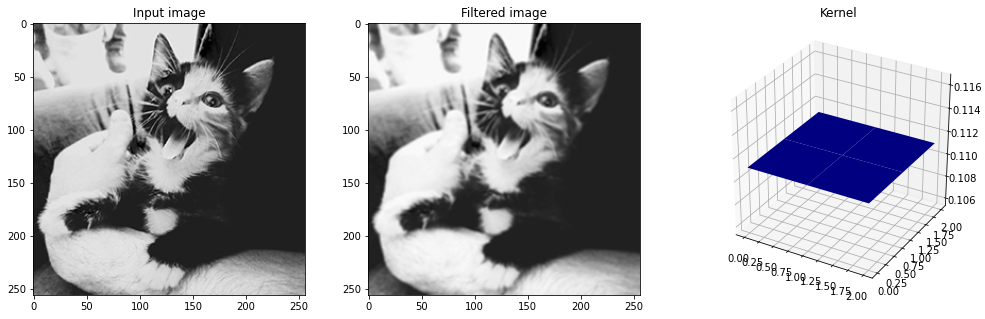

In [11]:
kernel = np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]])

kernel = kernel/kernel.sum()

print(kernel)

img_filt = convolve2d(img, kernel, mode='same',boundary='symm')
plot_images_and_kernel(img, img_filt, kernel)

### Filtro Circle

[[0.  0.2 0. ]
 [0.2 0.2 0.2]
 [0.  0.2 0. ]]


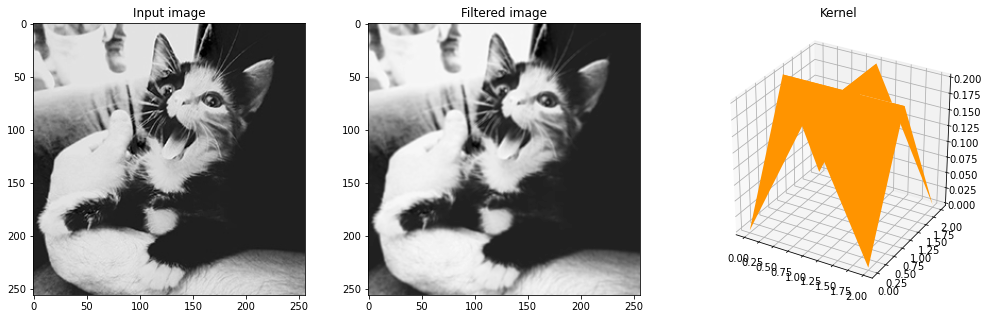

In [12]:
kernel = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]])

kernel = kernel/kernel.sum()

print(kernel)

img_filt = convolve2d(img, kernel, mode='same',boundary='symm')
plot_images_and_kernel(img, img_filt, kernel)

### Filtro Barlett

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


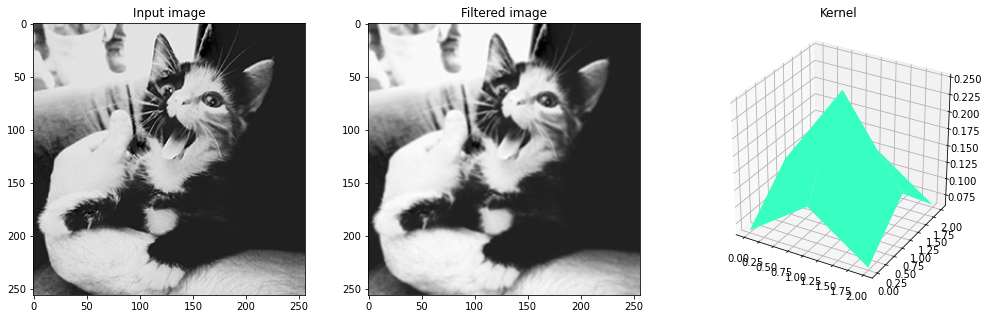

In [13]:
kernel = np.array([[1,2,1],
                   [2,4,2],
                   [1,2,1]])

kernel = kernel/kernel.sum()

print(kernel)

img_filt = convolve2d(img, kernel, mode='same',boundary='symm')
plot_images_and_kernel(img, img_filt, kernel)

### Filtro Gaussiano

[[0.09533172 0.11809491 0.09533172]
 [0.11809491 0.14629346 0.11809491]
 [0.09533172 0.11809491 0.09533172]]


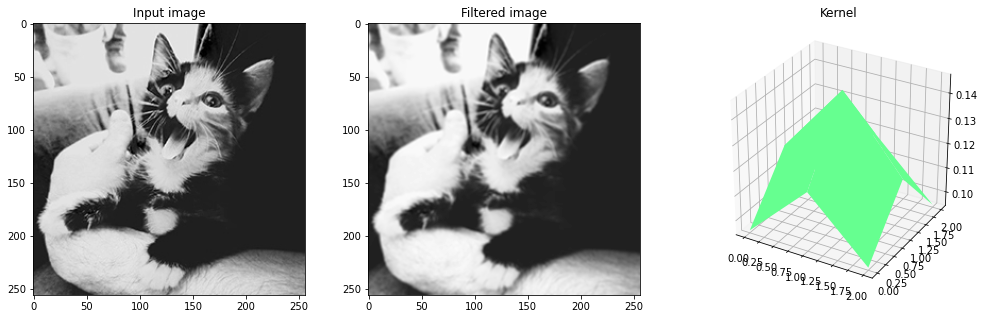

In [14]:
kernel = gaussian(3)

print(kernel)

img_filt = convolve2d(img, kernel, mode='same',boundary='symm')
plot_images_and_kernel(img, img_filt, kernel)

## Filtros Pasaaltos

### Filtro Laplaciano de 4 vecinos

[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


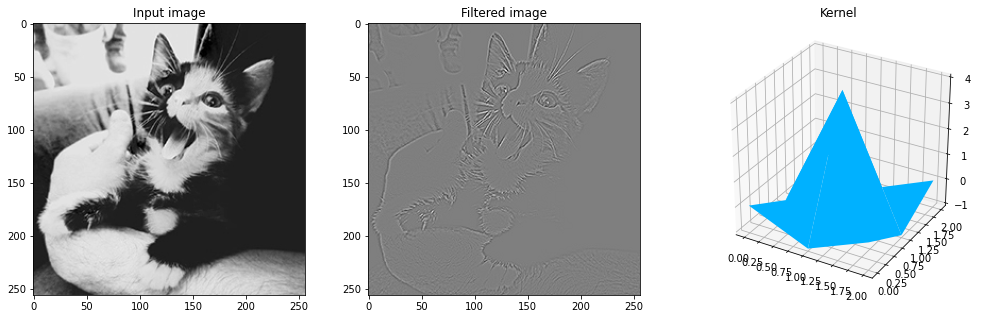

In [15]:
kernel = np.array([[0,-1,0],
                   [-1,4,-1],
                   [0,-1,0]])

print(kernel)

img_filt = convolve2d(img, kernel, mode='same',boundary='symm')
plot_images_and_kernel(img, img_filt, kernel)

### Filtro Laplaciano de 8 vecinos

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


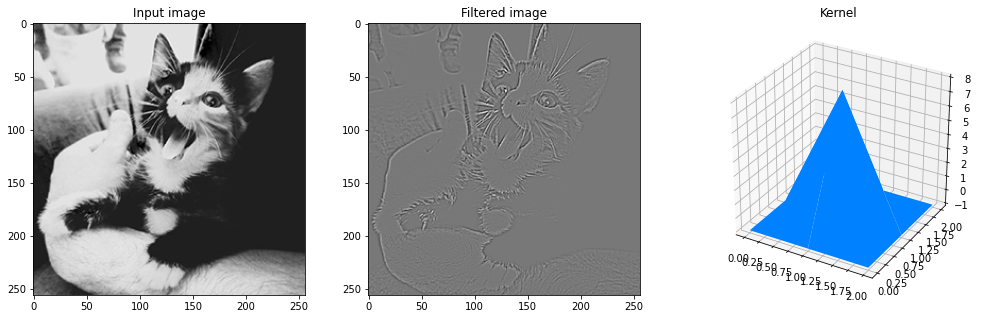

In [16]:
kernel = np.array([[-1,-1,-1],
                   [-1,8,-1],
                   [-1,-1,-1]])

print(kernel)

img_filt = convolve2d(img, kernel, mode='same',boundary='symm')
plot_images_and_kernel(img, img_filt, kernel)

### Filtro Pasaaltos a partir de un pasabajos tipo Box

[[ 0.88888889 -0.11111111 -0.11111111]
 [-0.11111111  0.88888889 -0.11111111]
 [-0.11111111 -0.11111111  0.88888889]]


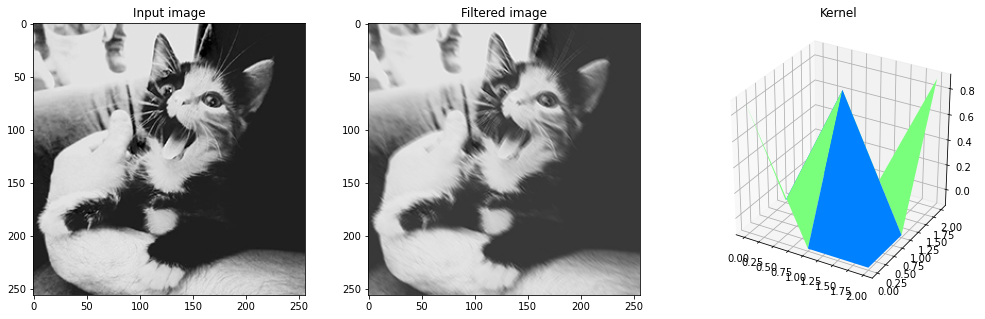

In [17]:
kernel_box = np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]])

kernel_box = kernel_box/kernel_box.sum()

kernel_identidad = np.array([[1,0,0],
                            [0,1,0],
                            [0,0,1]])

kernel = kernel_identidad - kernel_box

print(kernel)

img_filt = convolve2d(img, kernel, mode='same',boundary='symm')
plot_images_and_kernel(img, img_filt, kernel)

## Filtros Pasabanda

### Filtro por diferencia de Gaussianos (DoG)

[[-0.02867168 -0.03633314 -0.0393175  -0.03633314 -0.02867168]
 [-0.03633314  0.01645815  0.07517634  0.01645815 -0.03633314]
 [-0.0393175   0.07517634  0.1960839   0.07517634 -0.0393175 ]
 [-0.03633314  0.01645815  0.07517634  0.01645815 -0.03633314]
 [-0.02867168 -0.03633314 -0.0393175  -0.03633314 -0.02867168]]


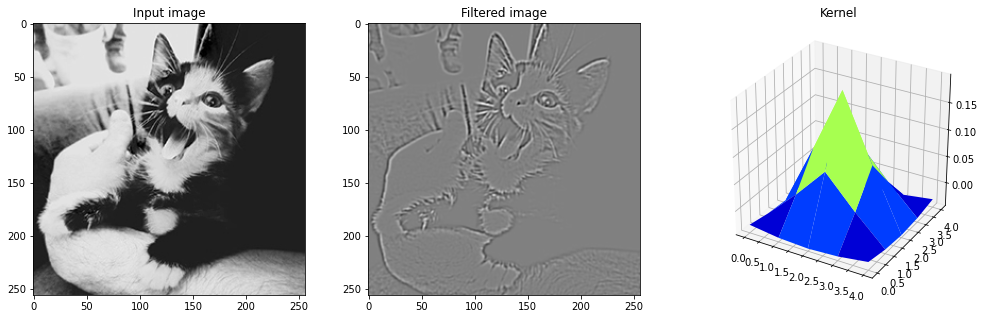

In [18]:
kernel_g3 = np.array([[0,0,0,0,0],
                     [0,16,32,16,0],
                     [0,32,64,32,0],
                     [0,16,32,16,0],
                     [0,0,0,0,0]])

kernel_g3 = kernel_g3/kernel_g3.sum()

kernel_g5 = gaussian(5)

kernel = kernel_g3 - kernel_g5

print(kernel)

img_filt = convolve2d(img, kernel, mode='same',boundary='symm')
plot_images_and_kernel(img, img_filt, kernel)

## Otros Filtros

### Filtro de mejora de contraste

[[ 0.  -0.1  0. ]
 [-0.1  1.4 -0.1]
 [ 0.  -0.1  0. ]]


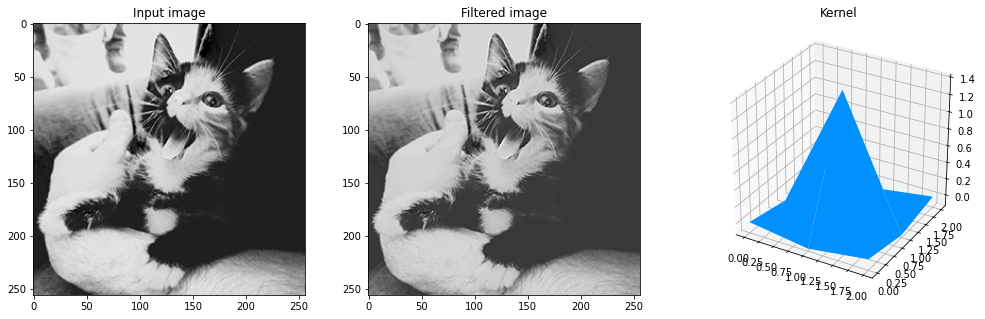

In [19]:
kernel_laplace = np.array([[0,-1,0],
                         [-1,4,-1],
                         [0,-1,0]])

kernel_laplace = kernel_laplace*0.1

kernel_identidad = np.array([[0,0,0],
                            [0,1,0],
                            [0,0,0]])

kernel = kernel_identidad + kernel_laplace

print(kernel)

img_filt = convolve2d(img, kernel, mode='same',boundary='symm')
plot_images_and_kernel(img, img_filt, kernel)

## Filtros Asimetricos

### Sobel 3x3

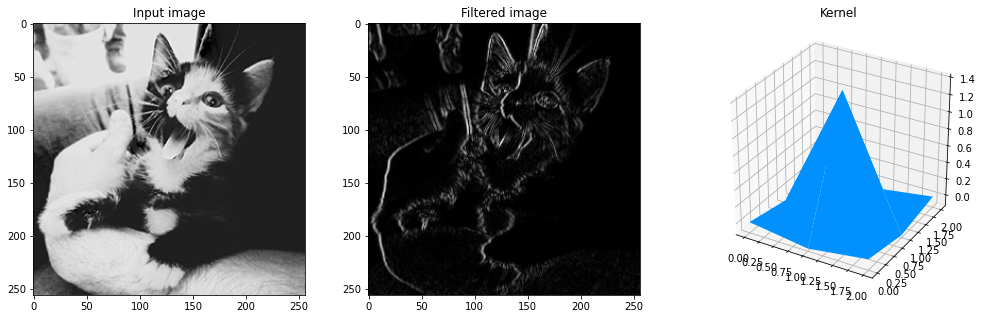

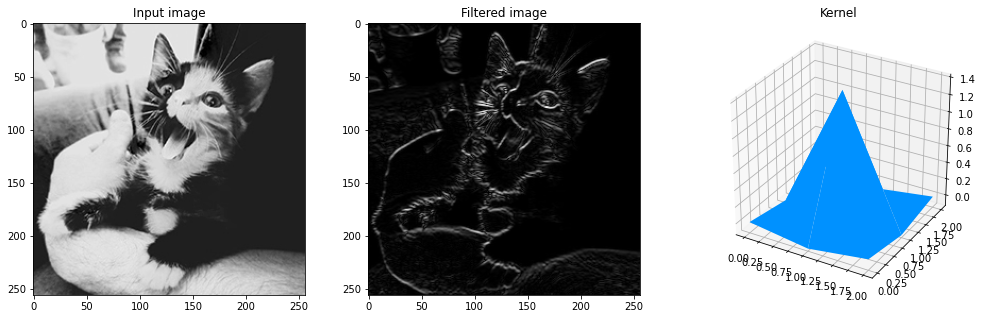

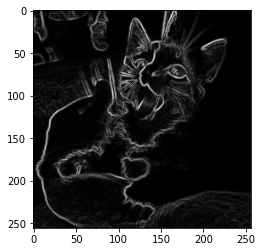

In [23]:
kernelX = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])

kernelY = np.array([[1,2,1],
                   [0,0,0],
                   [-1,-2,-1]])


img_filt_X = convolve2d(img, kernelX, mode='same',boundary='symm')
img_filt_Y = convolve2d(img, kernelY, mode='same',boundary='symm')

absoluto = np.sqrt(img_filt_X*img_filt_X + img_filt_Y*img_filt_Y)

plot_images_and_kernel(img, abs(img_filt_X), kernel)
plot_images_and_kernel(img, abs(img_filt_Y), kernel)
plt.imshow(absoluto, 'gray')


### Sobel Binario

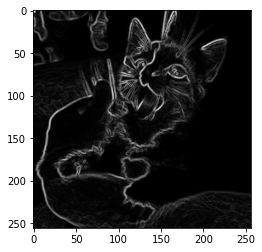

In [38]:
absoluto = absoluto/absoluto.max()   

for i in range(3):
  for j in range(3):
    if absoluto[i,j] > 0.5 :
       absoluto[i,j] = 1
    else: 
       absoluto[i,j] = 0  
      
plt.imshow(absoluto, 'gray')